# **load from drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
root_dir = '/content/drive/My Drive/march1/'
%cd $root_dir

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/march1


# import *libraries*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import imutils
import pytesseract
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

***load text reading library***

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#code starts




annotation for one image

In [ ]:
# Loads the data required for detecting the license plates from cascade classifier.
plate_cascade = cv2.CascadeClassifier('indian_license_plate.xml')

*load the image - 1 file only*:

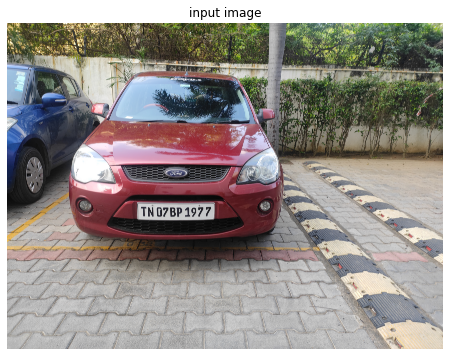

In [ ]:
def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

#img = cv2.imread('/content/drive/MyDrive/march1/1.PNG')
img = cv2.imread('/content/drive/MyDrive/march1/tn_data/train/class_0/8.jpg')
display(img, 'input image')

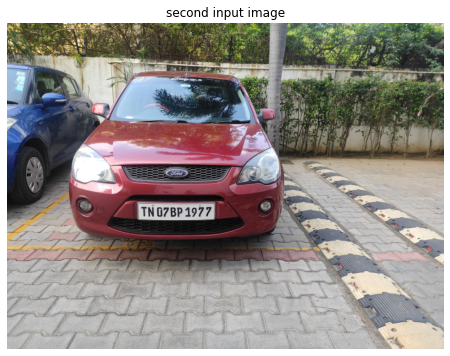

In [ ]:
image = imutils.resize(img, width=800 )
display(image, 'second input image')

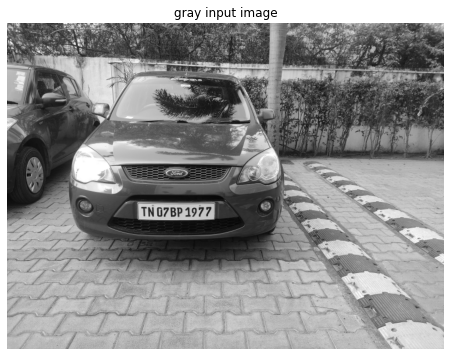

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(gray_image, 'gray input image')

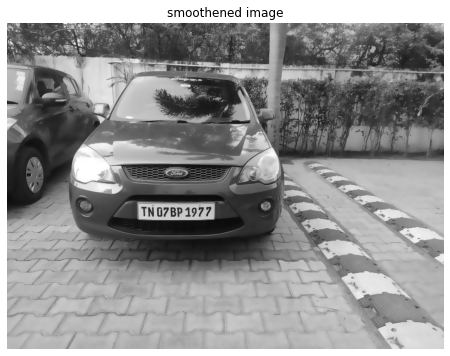

In [ ]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17)
display(gray_image, 'smoothened image')

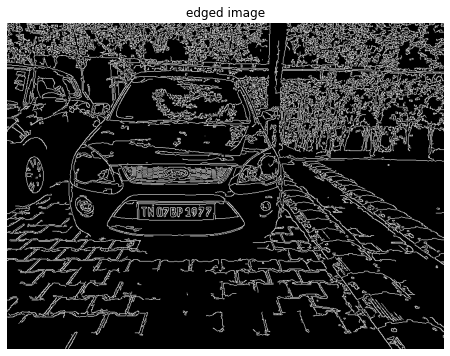

In [ ]:
edged = cv2.Canny(gray_image, 30, 200)
display(edged, 'edged image')

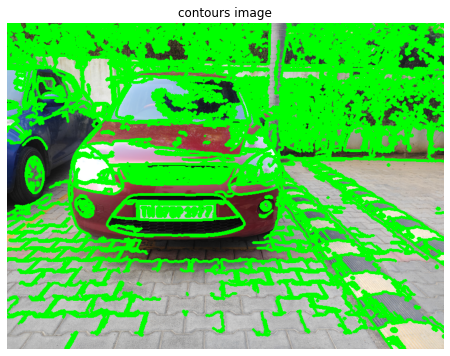

In [ ]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
display(image1, 'contours image')

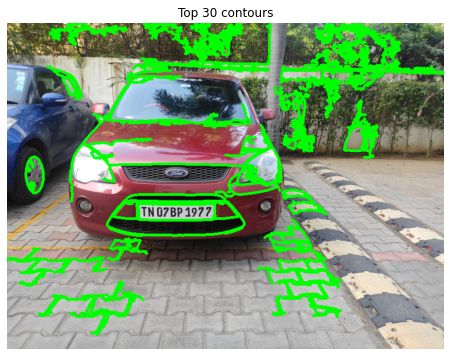

In [ ]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
display(image2,"Top 30 contours")


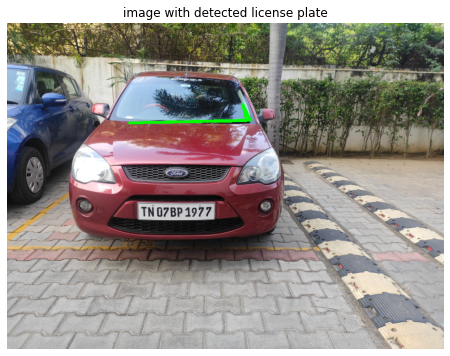

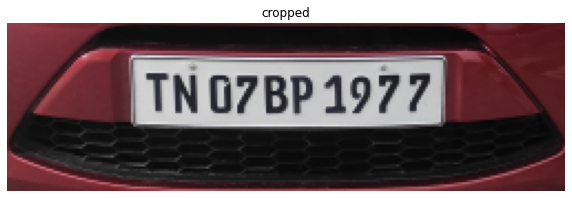

<class 'str'>
Number plate is: ©) 1078p 1977)



In [ ]:
i=210
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4:
                screenCnt = approx
        x,y,w,h = cv2.boundingRect(c)
        new_img=image[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.png',new_img)
        i+=1
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
display(image,"image with detected license plate")
cv2.waitKey(0)

Cropped_loc = './210.png'
display(cv2.imread(Cropped_loc),"cropped")
plate = pytesseract.image_to_string(Cropped_loc, lang='eng', config='--psm 6')
print(type(plate))
print("Number plate is:", plate)

#cnn model


In [ ]:
## create model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

# load dataset characters

1.   train characters
2.   val charaters



In [ ]:
path = '../content/drive/MyDrive/march1/data'
train_folder = cv2.imread(path+'/train')
val_folder =cv2.imread(path+'/val')
train_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.1,height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('../content/drive/MyDrive/march1/data/train', target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')

FileNotFoundError: ignored

# load dataset tamilnadu

In [ ]:
path = '../content/drive/MyDrive/march1/tn_data'
train_folder = cv2.imread(path+'/train')
val_folder =cv2.imread(path+'/val')
train_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.1,height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('../content/drive/MyDrive/march1/tn_data/train', target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')